In [64]:
import pandas as pd

data = pd.read_csv('istanbul.csv')
sütunlar = [
    'Yapı Durumu', 'Krediye Uygunluk', 'Isıtma Tipi', 
    'Site İçerisinde', 'Kullanım Durumu', 'Yatırıma Uygunluk', 
    'Banyo Sayısı', 'WC Sayısı', 'Eşya Durumu', 'Tapu Durumu', 
    'Balkon Sayısı', 'Tipi', 'Unnamed: 0'
]       
data = data.apply(lambda x: x.str.replace(r'0 \(Yeni\)', '0', regex=True) if x.dtype == "object" else x)
data = data.apply(lambda x: x.str.replace(r'Ve Üzeri', '', regex=True) if x.dtype == "object" else x)
data.drop(columns=sütunlar, inplace=True, errors='ignore')
data.columns

Index(['Fiyat', 'Oda Sayısı', 'Bulunduğu Kat', 'Brüt Metrekare',
       'Binanın Yaşı', 'Binanın Kat Sayısı', 'Sehir', 'Ilce', 'Mahalle'],
      dtype='object')

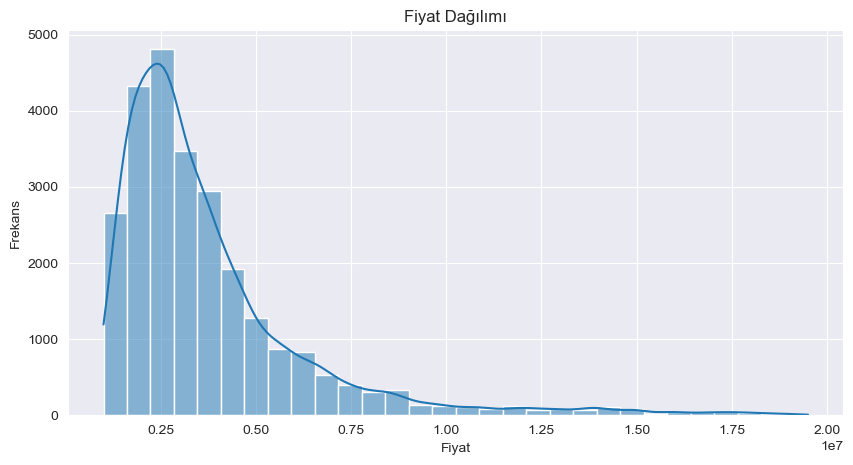

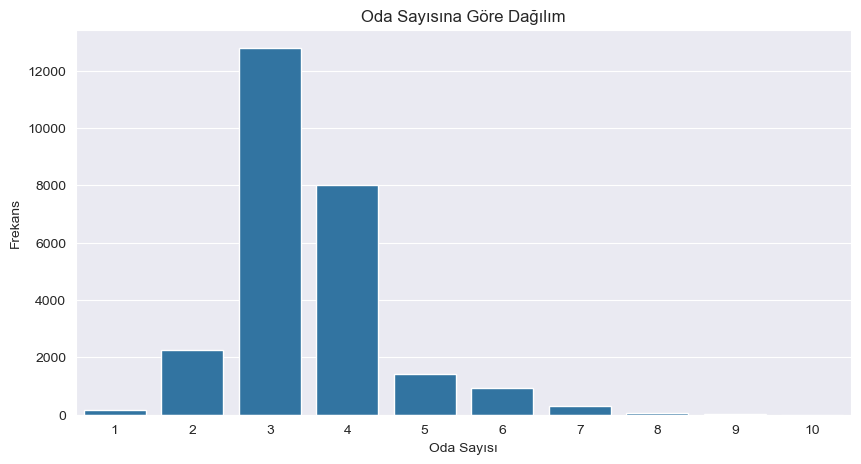

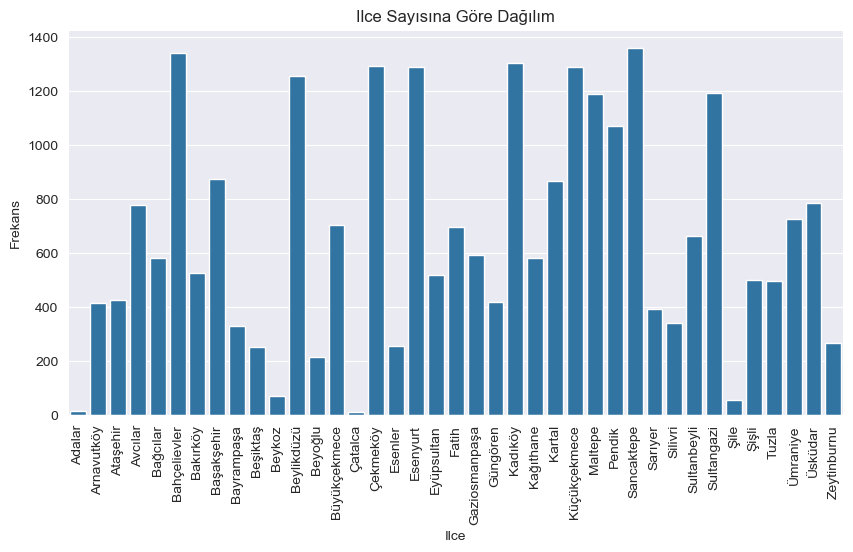

In [14]:
#Veri analizi aşaması
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data['Fiyat'], bins=30, kde=True)
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Oda Sayısı', data=data)
plt.title('Oda Sayısına Göre Dağılım')
plt.xlabel('Oda Sayısı')
plt.ylabel('Frekans')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Ilce', data=data)
plt.title('Ilce Sayısına Göre Dağılım')
plt.xlabel('Ilce')
plt.xticks(rotation=90)
plt.ylabel('Frekans')
plt.show()


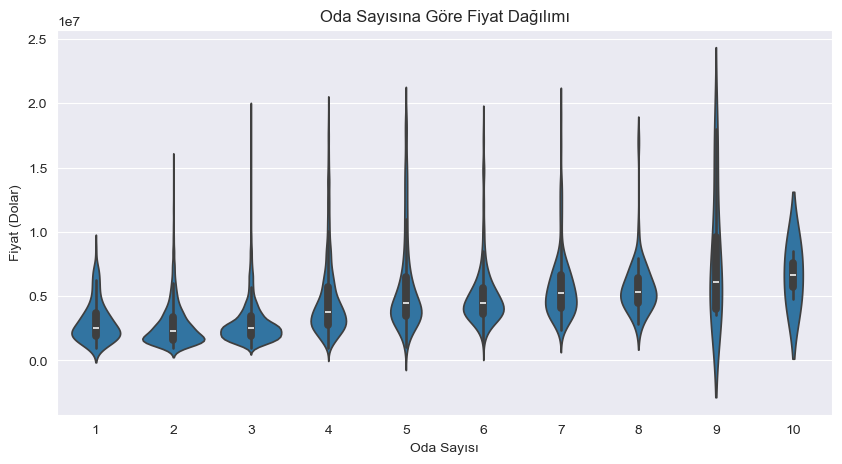

In [28]:
# Oda Sayısı ile Fiyat arasındaki ilişki
plt.figure(figsize=(10, 5))
sns.violinplot(x='Oda Sayısı', y='Fiyat', data=data)
plt.title('Oda Sayısına Göre Fiyat Dağılımı')
plt.xlabel('Oda Sayısı')
plt.ylabel('Fiyat (Dolar)')
plt.show()

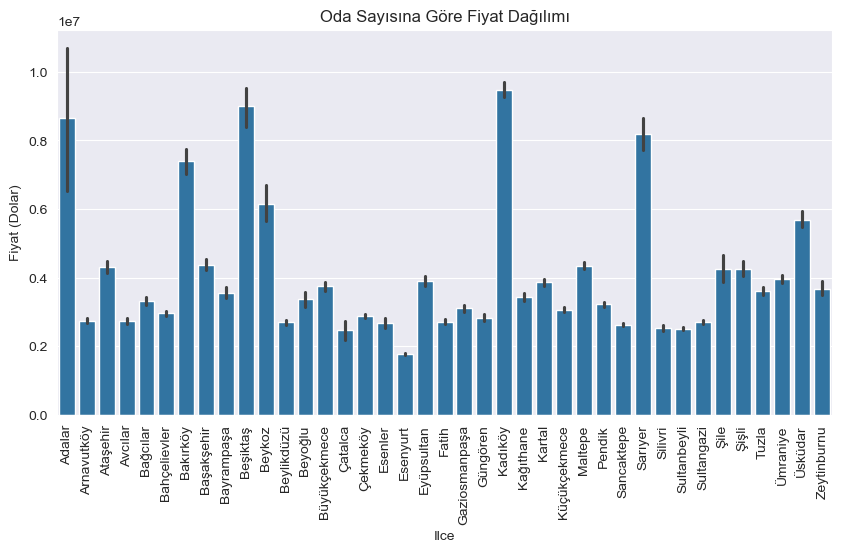

In [33]:
# Ilce ile Fiyat arasındaki ilişki
plt.figure(figsize=(10, 5))
sns.barplot(x='Ilce', y='Fiyat', data=data)
plt.title('Ilceye Göre Fiyat Dağılımı')
plt.xlabel('Ilce')
plt.xticks(rotation=90)
plt.ylabel('Fiyat (Dolar)')
plt.show()

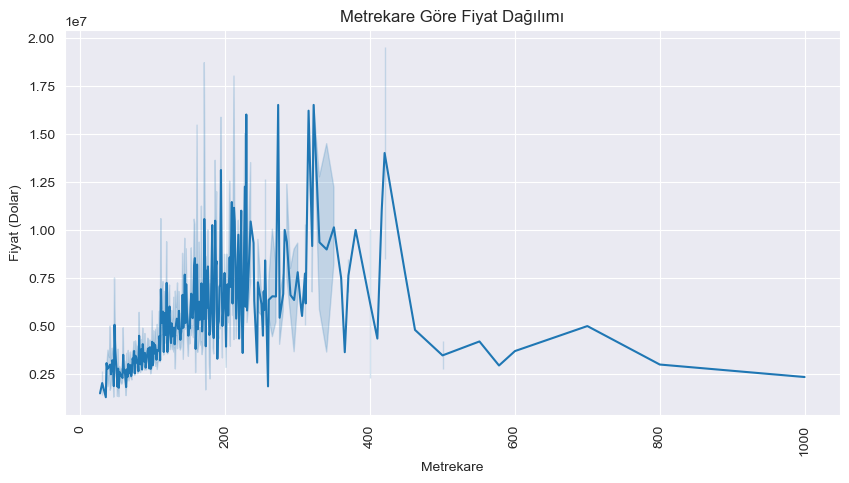

In [37]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Brüt Metrekare', y='Fiyat', data=data)
plt.title('Metrekare Göre Fiyat Dağılımı')
plt.xlabel('Metrekare')
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Fiyat (Dolar)')
plt.show()

In [65]:
#One-Hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(data[['Ilce', 'Oda Sayısı']])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Ilce', 'Oda Sayısı']))

data = pd.concat([data.drop(columns=['Ilce', 'Oda Sayısı']), encoded_df], axis=1)
data

,Fiyat,Bulunduğu Kat,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Sehir,Mahalle,Ilce_Adalar,Ilce_Arnavutköy,Ilce_Ataşehir,...,Oda Sayısı_1,Oda Sayısı_2,Oda Sayısı_3,Oda Sayısı_4,Oda Sayısı_5,Oda Sayısı_6,Oda Sayısı_7,Oda Sayısı_8,Oda Sayısı_9,Oda Sayısı_10
0,2950000,1,85,21,4,İstanbul,Heybeliada Mahallesi,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9450000,2,170,21,3,İstanbul,Maden Mahallesi,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3550000,1,85,21,3,İstanbul,Heybeliada Mahallesi,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15300000,6,250,21,6,İstanbul,Burgazada Mahallesi,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13000000,2,230,21,3,İstanbul,Heybeliada Mahallesi,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25903,3900000,1,95,0,5,İstanbul,Veliefendi Mahallesi,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25904,8000000,5,250,21,5,İstanbul,Beştelsiz Mahallesi,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25905,4100000,3,100,5-10,5,İstanbul,Nuripaşa Mahallesi,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25906,5000000,5,250,21,5,İstanbul,Beştelsiz Mahallesi,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [74]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Mahalle'] = label_encoder.fit_transform(data['Mahalle'])
data['Binanın Yaşı'] = label_encoder.fit_transform(data['Binanın Yaşı'])
data['Bulunduğu Kat'] = label_encoder.fit_transform(data['Bulunduğu Kat'])
data = data.drop('Sehir', axis=1)
data

,Fiyat,Bulunduğu Kat,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Mahalle,Ilce_Adalar,Ilce_Arnavutköy,Ilce_Ataşehir,Ilce_Avcılar,...,Oda Sayısı_1,Oda Sayısı_2,Oda Sayısı_3,Oda Sayısı_4,Oda Sayısı_5,Oda Sayısı_6,Oda Sayısı_7,Oda Sayısı_8,Oda Sayısı_9,Oda Sayısı_10
0,2950000,5,85,5,4,229,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9450000,6,170,5,3,302,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3550000,5,85,5,3,229,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15300000,10,250,5,6,101,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13000000,6,230,5,3,229,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25903,3900000,5,95,0,5,463,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25904,8000000,9,250,5,5,91,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25905,4100000,7,100,8,5,352,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25906,5000000,9,250,5,5,91,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
#Learning
from sklearn.model_selection import train_test_split

X = data.drop('Fiyat', axis=1)
y = data['Fiyat']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [101]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [103]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: 0.8089371954783432


In [106]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [107]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")


Mean Squared Error: 2505523203977.24
R²: 0.62


In [110]:
from sklearn.svm import SVR

model = SVR(kernel='poly', degree=3, C=1)
model.fit(X_train_scaled, y_train)

SVR(C=1, kernel='poly')

In [115]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")


R²: 0.83


In [112]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [114]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

R²: 0.83
